In [6]:
import pandas as pd
import datetime



def generate_purchase_seq():
    dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y%m%d')
    user_balance = pd.read_csv('./data/user_balance_table.csv', parse_dates=['report_date'],
                               index_col='report_date', date_parser=dateparse)

    df = user_balance.groupby(['report_date'])['total_purchase_amt'].sum()
    purchase_seq = pd.Series(df, name='value')

    purchase_seq_train = purchase_seq['2014-04-01':'2014-07-31']
    purchase_seq_test = purchase_seq['2014-08-01':'2014-08-10']

    purchase_seq_train.to_csv(path_or_buf='./data/purchase_seq_train.csv', header=True)
    purchase_seq_test.to_csv(path_or_buf='./data/purchase_seq_test.csv', header=True)


generate_purchase_seq()

C:\Users\29485\AppData\Local\Temp\ipykernel_7584\741369234.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  user_balance = pd.read_csv('./data/user_balance_table.csv', parse_dates=['report_date'],


timeseries_adf :  (-2.0639747511769913, 0.25924499643351473, 13, 108, {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}, 4191.005978668394)
timeseries_diff1_adf :  (-6.542516143607563, 9.270661450976566e-09, 12, 109, {'1%': -3.49181775886872, '5%': -2.8884437992971588, '10%': -2.5811201893779985}, 4193.843107210291)
timeseries_diff2_adf :  (-5.6155458674544905, 1.1766955956629065e-06, 13, 108, {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}, 4222.922633673087)


C:\Users\29485\AppData\Local\Temp\ipykernel_7584\2019892734.py:33: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  purchase_seq_train = pd.read_csv('./data/purchase_seq_train.csv', parse_dates=['report_date'],


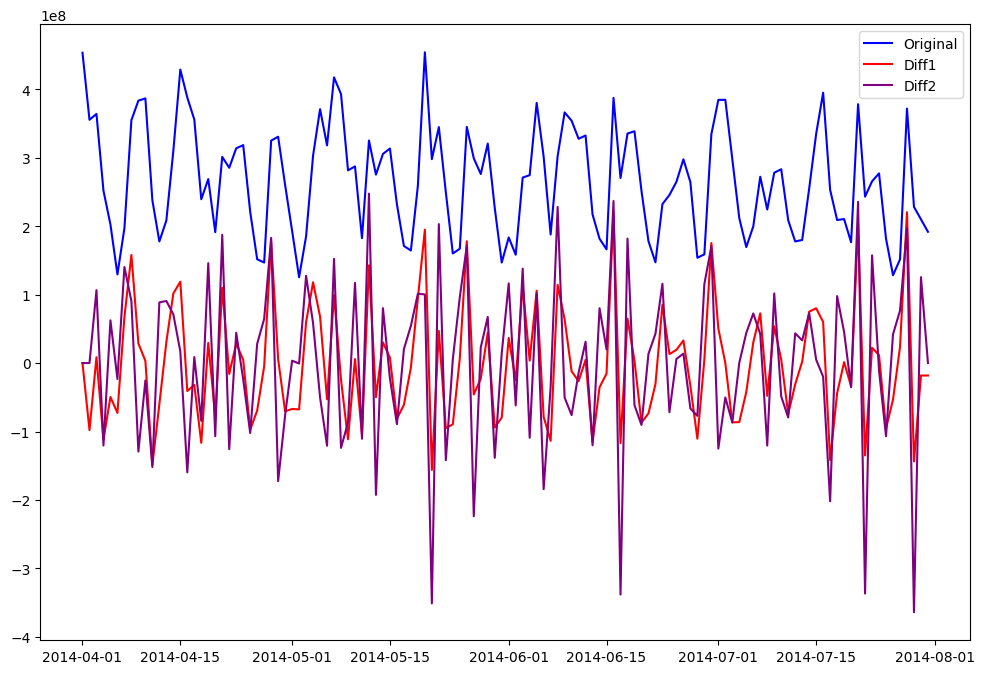

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF


def diff(timeseries):
    print(timeseries)
    timeseries_diff1 = timeseries.diff(1)
    print(timeseries_diff1)
    timeseries_diff2 = timeseries_diff1.diff(1)
    print(timeseries_diff2)

    timeseries_diff1 = timeseries_diff1.fillna(0)
    timeseries_diff2 = timeseries_diff2.fillna(0)

    timeseries_adf = ADF(timeseries['value'].tolist())
    timeseries_diff1_adf = ADF(timeseries_diff1['value'].tolist())
    timeseries_diff2_adf = ADF(timeseries_diff2['value'].tolist())

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()


dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./data/purchase_seq_train.csv', parse_dates=['report_date'],
                                 index_col='report_date', date_parser=dateparse)

diff(purchase_seq_train)

C:\Users\29485\AppData\Local\Temp\ipykernel_7584\1046228596.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  purchase_seq_train = pd.read_csv('./data/purchase_seq_train.csv', parse_dates=['report_date'],


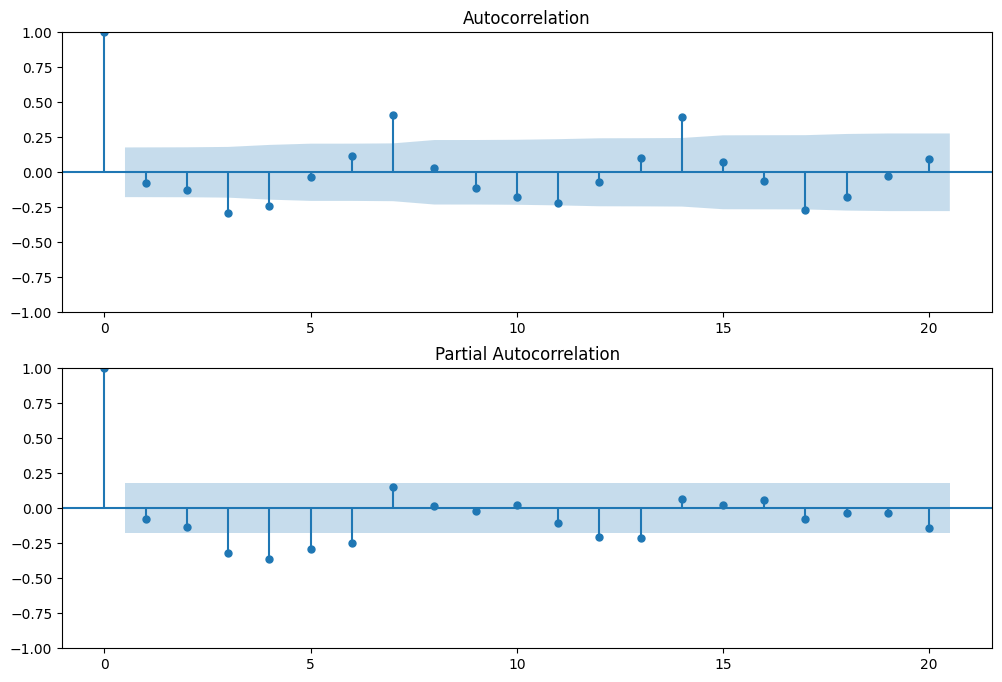

In [11]:
def autocorrelation(timeseries, lags):
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(timeseries, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(timeseries, lags=lags, ax=ax2)
    plt.show()


dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./data/purchase_seq_train.csv', parse_dates=['report_date'],
                                 index_col='report_date', date_parser=dateparse)

purchase_seq_train_diff = purchase_seq_train.diff(1)
purchase_seq_train_diff = purchase_seq_train_diff.fillna(0)

autocorrelation(purchase_seq_train_diff, 20)

C:\Users\29485\AppData\Local\Temp\ipykernel_7584\3755956456.py:24: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  purchase_seq_train = pd.read_csv('./data/purchase_seq_train.csv', parse_dates=['report_date'],


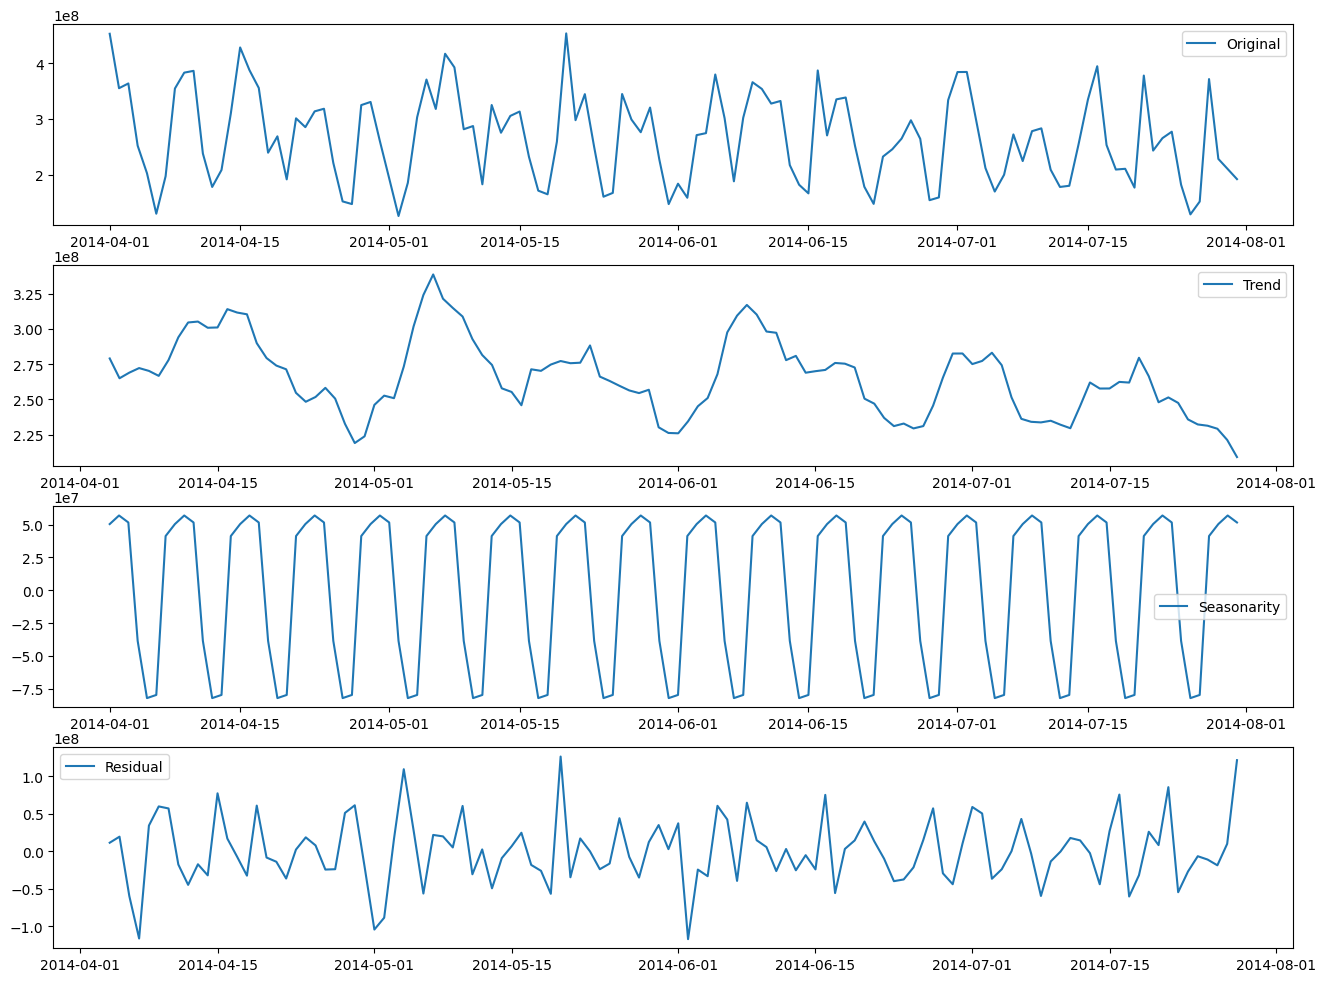

In [26]:
def decomposing(timeseries):
    decomposition = seasonal_decompose(timeseries)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(16, 12))
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonarity')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.show()


dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./data/purchase_seq_train.csv', parse_dates=['report_date'],
                                 index_col='report_date', date_parser=dateparse)

decomposing(purchase_seq_train)

timeseries_adf :  (-3.236848758448586, 0.01794838366588161, 0, 121, {'1%': -3.485585145896754, '5%': -2.885738566292665, '10%': -2.5796759080663887}, 3971.5751227480287)
timeseries_diff1_adf :  (-10.571816201699766, 7.2723798146224e-19, 0, 121, {'1%': -3.485585145896754, '5%': -2.885738566292665, '10%': -2.5796759080663887}, 3970.0252957725997)
timeseries_diff2_adf :  (-5.522044427904821, 1.8681654787397836e-06, 8, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 3975.173191562041)


C:\Users\29485\AppData\Local\Temp\ipykernel_7584\3766185983.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  purchase_seq_train = pd.read_csv('./data/purchase_seq_train.csv', parse_dates=['report_date'],


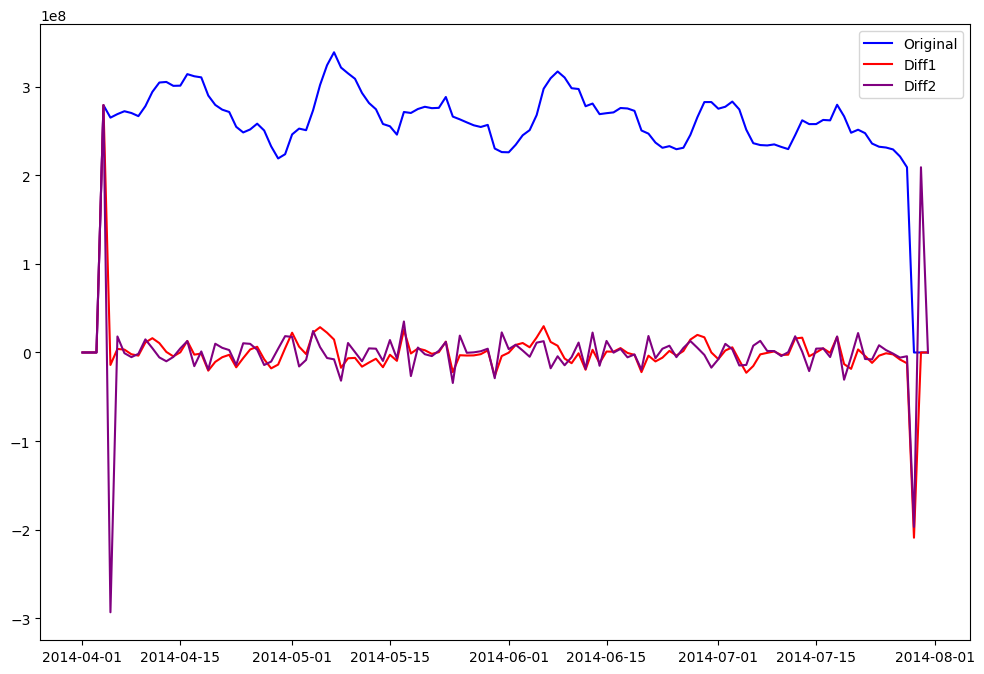

timeseries_adf :  (-6.290212104648351, 3.614727756796327e-08, 8, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 4080.577975834708)
timeseries_diff1_adf :  (-5.9031502683809745, 2.7477376300419303e-07, 13, 108, {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}, 4107.235275181308)
timeseries_diff2_adf :  (-6.6447268786448745, 5.300796399130612e-09, 13, 108, {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}, 4137.527983157887)


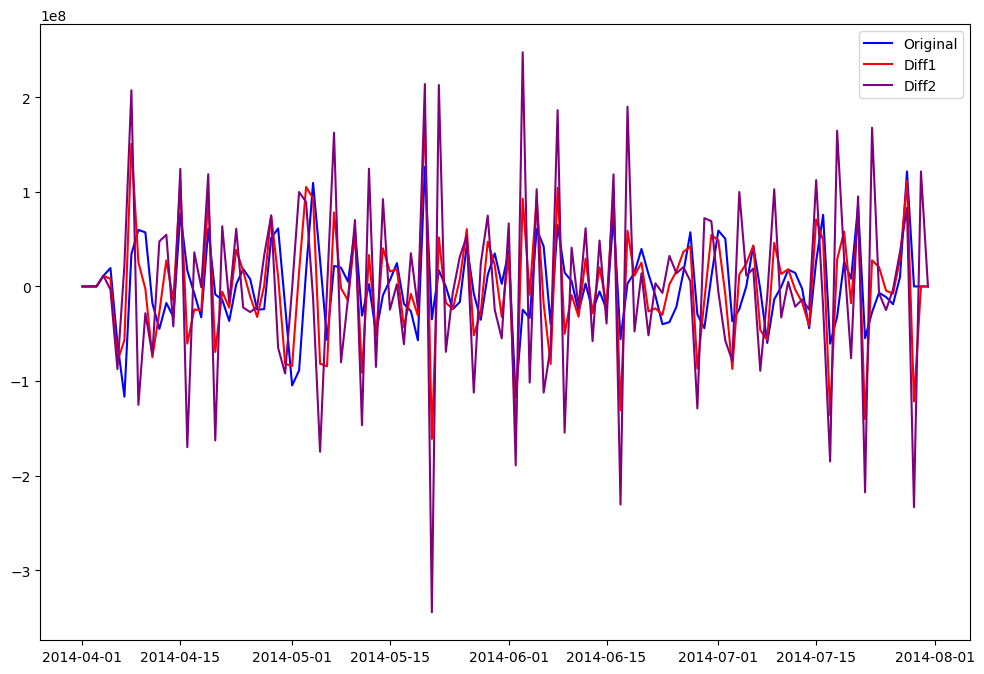

In [56]:
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./data/purchase_seq_train.csv', parse_dates=['report_date'],
                                 index_col='report_date', date_parser=dateparse)


decomposition = seasonal_decompose(purchase_seq_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)
diff(trend.to_frame().rename(columns={'trend':'value'}))
# timeseries_adf :  (-3.2368487584485877, 0.017948383665881536, 0, 121, {'10%': -2.5796759080663887, '5%': -2.885738566292665, '1%': -3.485585145896754}, 3971.5751227480287)
# timeseries_diff1_adf :  (-10.571816201699766, 7.2723798146224e-19, 0, 121, {'10%': -2.5796759080663887, '5%': -2.885738566292665, '1%': -3.485585145896754}, 3970.0252957725997)
# timeseries_diff2_adf :  (-5.522044427904824, 1.868165478739749e-06, 8, 113, {'10%': -2.580604145195395, '5%': -2.887477210140433, '1%': -3.489589552580676}, 3975.173191562041)


diff(residual.to_frame().rename(columns={'resid':'value'}))
# timeseries_adf :  (-6.290212104648347, 3.614727756796406e-08, 8, 113, {'10%': -2.580604145195395, '1%': -3.489589552580676, '5%': -2.887477210140433}, 4080.577975834708)
# timeseries_diff1_adf :  (-5.903150268380962, 2.7477376300421066e-07, 13, 108, {'10%': -2.5812552709190673, '1%': -3.4924012594942333, '5%': -2.8886968193364835}, 4107.235275181308)
# timeseries_diff2_adf :  (-6.6447268786449385, 5.3007963991287325e-09, 13, 108, {'10%': -2.5812552709190673, '1%': -3.4924012594942333, '5%': -2.8886968193364835}, 4137.527983157887)

C:\Users\29485\AppData\Local\Temp\ipykernel_7584\211439700.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  purchase_seq_train = pd.read_csv('./data/purchase_seq_train.csv', parse_dates=['report_date'],


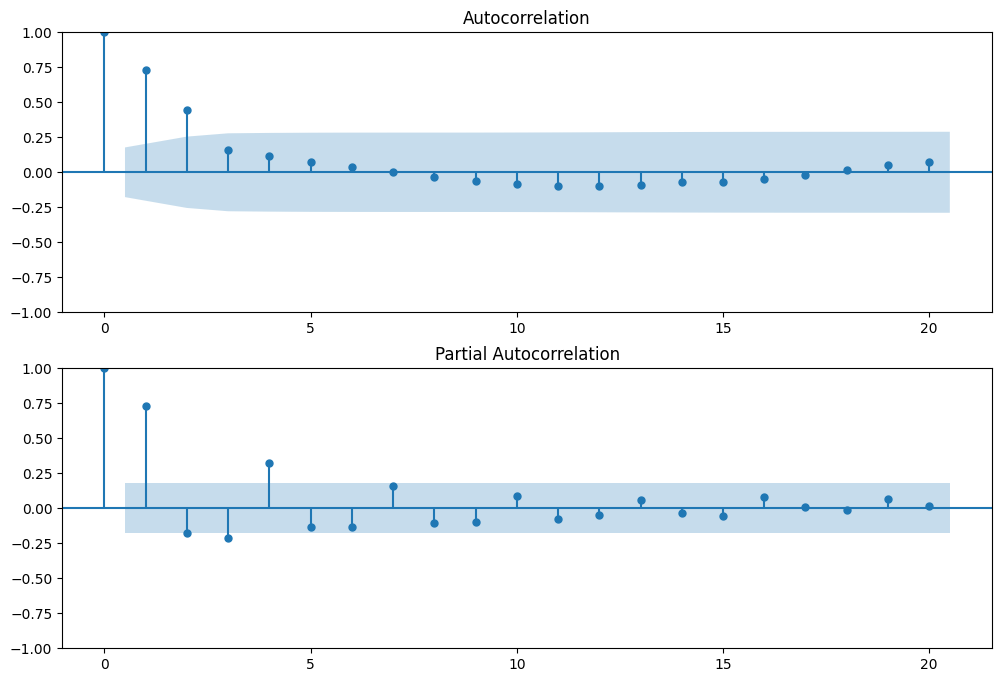

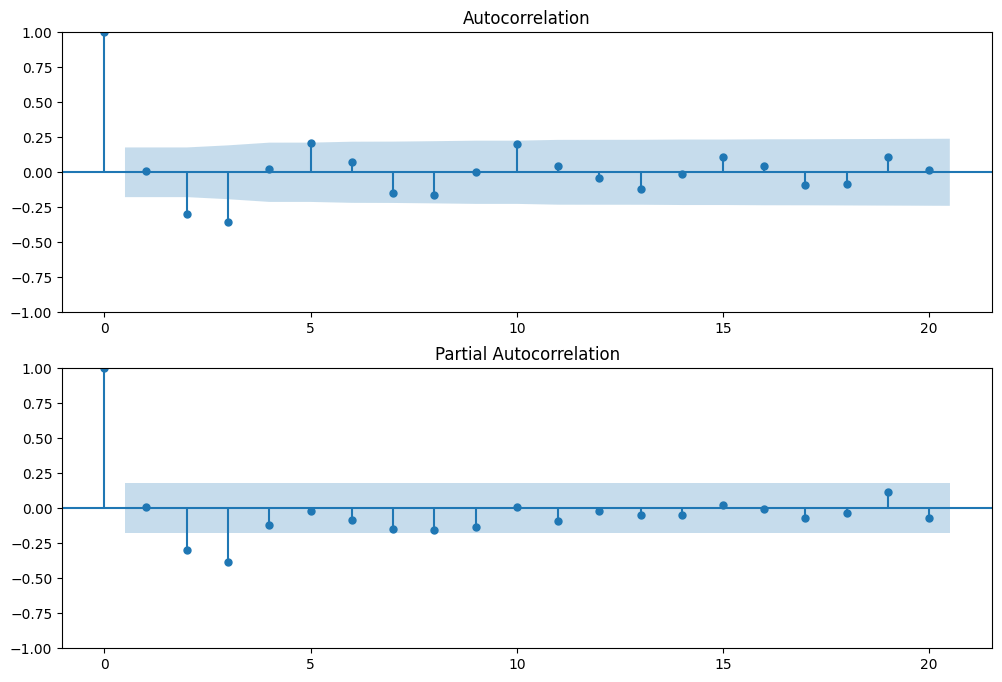

In [58]:
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./data/purchase_seq_train.csv', parse_dates=['report_date'],
                                 index_col='report_date', date_parser=dateparse)

decomposition = seasonal_decompose(purchase_seq_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

autocorrelation(trend, 20)

autocorrelation(residual, 20)

In [61]:
import statsmodels.api as sm


dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./data/purchase_seq_train.csv', parse_dates=['report_date'],
                                 index_col='report_date', date_parser=dateparse)

decomposition = seasonal_decompose(purchase_seq_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

trend_evaluate = sm.tsa.arma_order_select_ic(trend, ic=['aic', 'bic'], max_ar=6,
                                            max_ma=6)
print('trend AIC', trend_evaluate.aic_min_order)
print('trend BIC', trend_evaluate.bic_min_order)

residual_evaluate = sm.tsa.arma_order_select_ic(residual, ic=['aic', 'bic'], max_ar=6,
                                            max_ma=6)
print('residual AIC', residual_evaluate.aic_min_order)
print('residual BIC', residual_evaluate.bic_min_order)


C:\Users\29485\AppData\Local\Temp\ipykernel_7584\1454569018.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  purchase_seq_train = pd.read_csv('./data/purchase_seq_train.csv', parse_dates=['report_date'],
d:\python\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

trend AIC (1, 0)
trend BIC (1, 0)


d:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.

residual AIC (1, 5)
residual BIC (2, 1)


d:\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\29485\AppData\Local\Temp\ipykernel_7584\2260847834.py:14: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  purchase_seq_train = pd.read_csv('./data/purchase_seq_train.csv', parse_dates=['report_date'],
C:\Users\29485\AppData\Local\Temp\ipykernel_7584\2260847834.py:17: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  purchase_seq_test = pd.read_csv('./data/purchase_seq_test.csv', parse_dates=['report_date'],
d:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No fr

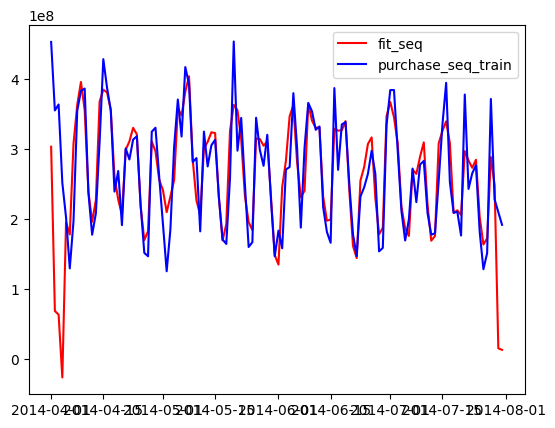

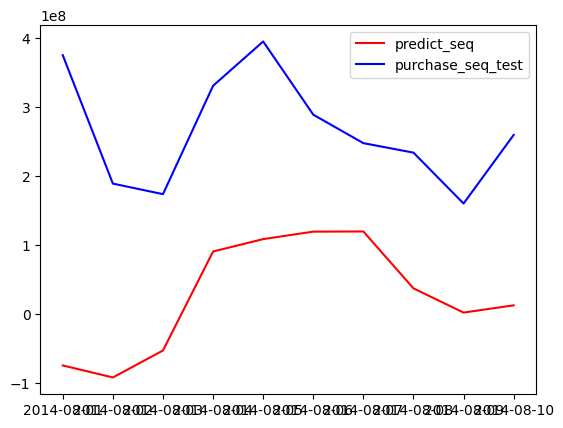

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF

def ARIMA_Model(timeseries, order):
    model = ARIMA(timeseries, order=order)
    return model.fit()


dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
purchase_seq_train = pd.read_csv('./data/purchase_seq_train.csv', parse_dates=['report_date'],
                                 index_col='report_date', date_parser=dateparse)

purchase_seq_test = pd.read_csv('./data/purchase_seq_test.csv', parse_dates=['report_date'],
                                index_col='report_date', date_parser=dateparse)


decomposition = seasonal_decompose(purchase_seq_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

# 趋势序列模型训练
trend_model = ARIMA_Model(trend.to_frame().rename(columns={'trend':'value'}), (1, 0, 0))
trend_fit_seq = trend_model.fittedvalues
trend_predict_seq = trend_model.predict(start='2014-08-01', end='2014-08-10', dynamic=True)

# 残差序列模型训练
residual_model = ARIMA_Model(residual.to_frame().rename(columns={'resid':'value'}), (2, 0, 1))
residual_fit_seq = residual_model.fittedvalues
residual_predict_seq = residual_model.predict(start='2014-08-01', end='2014-08-10', dynamic=True)


# 拟合训练集
fit_seq = pd.Series(seasonal.to_frame()['seasonal'], index=seasonal.index)
fit_seq = fit_seq.add(trend_fit_seq, fill_value=0)
fit_seq = fit_seq.add(residual_fit_seq, fill_value=0)

plt.plot(fit_seq, color='red', label='fit_seq')
plt.plot(purchase_seq_train, color='blue', label='purchase_seq_train')
plt.legend(loc='best')
plt.show()

# 预测测试集
# 这里测试数据的周期性是根据seasonal对象打印的结果，看到里面的数据每7天一个周期，2014-08-01~2014-08-10的数据正好和2014-04-04~2014-04-13的数据一致
seasonal_predict_seq = seasonal['2014-04-04':'2014-04-13']

predict_dates = pd.Series(
    ['2014-08-01', '2014-08-02', '2014-08-03', '2014-08-04', '2014-08-05', '2014-08-06', '2014-08-07', '2014-08-08',
     '2014-08-09', '2014-08-10']).apply(lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d'))

seasonal_predict_seq.index = predict_dates

predict_seq = pd.Series(seasonal_predict_seq.to_frame()['seasonal'], index=seasonal_predict_seq.index)
predict_seq = predict_seq.add(trend_predict_seq, fill_value=0)
predict_seq = predict_seq.add(residual_predict_seq, fill_value=0)

plt.plot(predict_seq, color='red', label='predict_seq')
plt.plot(purchase_seq_test, color='blue', label='purchase_seq_test')
plt.legend(loc='best')
plt.show()